# TRAIN SET AND STRAVA EDA
---
---

# Sources

In [1]:
# Adaptations from lessons 1.07, 1.08, and 8.02
# https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore")

In [3]:
a_df = pd.read_csv('../data/average/a_df.csv')
h_df = pd.read_csv('../data/high/h_df.csv')
s_df = pd.read_csv('../data/strava.csv')

In [4]:
# create speed column
a_df['speed_km_hr'] = (a_df['dist_diff_km']/a_df['time_diff_s'])*60*60
a_df['speed_km_hr'].fillna(0, inplace = True)
h_df['speed_km_hr'] = (h_df['dist_diff_km']/h_df['time_diff_s'])*60*60
h_df['speed_km_hr'].fillna(0, inplace = True)

# Descriptive Stats
---

## Means Compared
The means for the period of average cycling performance and high cycling performance had some interesting contrasts. **Overall many of the differences made sense given high performance cycling period was during the Spring month of April, consisted of a lot longer rides (75+ miles per week), and in varying terrains. Average performance consisted of shorter rides (< 30 miles per week), in the Summer month of July, and usually on the same local routes.**

In [5]:
a_means = pd.DataFrame(a_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].mean()).T
h_means = pd.DataFrame(h_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].mean()).T
# https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
mean_df = pd.concat([a_means, h_means])
mean_df['df'] = ['average', 'high']
mean_df = mean_df[['df','elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].reset_index(drop = True)
mean_df

,df,elevation,heart_rate,total_time_s,total_ele_change_m,total_dist_km,speed_km_hr,temp,pressure,humidity,wind_speed,wind_deg
0,average,45.852806,130.216524,4321.134897,15.606069,16.800886,19.657203,301.292206,1012.618101,44.217651,2.849349,201.724906
1,high,111.131974,130.536503,8399.799067,0.453819,36.261384,20.171376,294.003020,1016.601062,35.675518,4.245174,228.520440


## Standard Deviations Compared
Standard Deviations also had some interesting contrasts which made sense based on seasonal weather, distances, and terrains of the types of cycling activities done in July (average performance time period) compared to April (high performance time period).

In [6]:
a_std = pd.DataFrame(a_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].std()).T
h_std = pd.DataFrame(h_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].std()).T
# https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
std_df = pd.concat([a_std, h_std])
std_df['df'] = ['average', 'high']
std_df = std_df[['df','elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].reset_index(drop = True)
std_df

,df,elevation,heart_rate,total_time_s,total_ele_change_m,total_dist_km,speed_km_hr,temp,pressure,humidity,wind_speed,wind_deg
0,average,35.234763,22.326544,3928.332512,36.065958,12.365763,7.522595,4.980350,2.278902,15.954423,1.763974,73.641993
1,high,101.052281,16.295913,7307.734127,67.987665,32.619315,8.169250,4.925191,4.551366,16.943021,2.471781,95.418639


## Maximums Compared
Maximums really highlight the difference in performance periods. 
- Max **distance** during high cycling was a 130km/80mile ride, my longest ride this year. 
- Max **heart rate** and **speed** for average period is higher than high performance period which makes sense since some shorter routes have been HIIT workouts, with sprinting, and have also been in higher heat which adds an extra cardio component. 
- Clearly can see the seasonal differences in the **temperature** differences. 311K (100F, 37.85C) in July during average period and 301K(82F, 27.85C) for April during the high period.
- Max windspeed during the high period was cross checked and from an organized metric century ride through the Bay Area. If I recall correctly some of those winds almost knocked me over. 

In [7]:
a_max = pd.DataFrame(a_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].max()).T
h_max = pd.DataFrame(h_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].max()).T
# https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
max_df = pd.concat([a_max, h_max])
max_df['df'] = ['average', 'high']
max_df = max_df[['df','elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].reset_index(drop = True)
max_df

,df,elevation,heart_rate,total_time_s,total_ele_change_m,total_dist_km,speed_km_hr,temp,pressure,humidity,wind_speed,wind_deg
0,average,149.000000,173.0,17192.0,108.2,51.1183,179.64,311.31,1020.0,85.0,8.49,345.0
1,high,573.200012,170.0,26819.0,130.4,130.0462,168.84,301.25,1024.0,86.0,12.35,360.0


In [8]:
# h_df[h_df['wind_speed'] == 12.35]

## Minimums Compared
Nothing too notable, same conclusions about weather seasons, but interesting how I went below sea level (in meters) on some routes, mostly from valley routes, and my minimum for elevation change during high performance had a pretty stark net decline. Cross checking on Strava and that was from a gravel bike ride around the American River, in the Sierra Mountains foothills, which was a super fun ride where I basically went from the top of a mountain down to a river in a canyon and back. 

In [9]:
a_min = pd.DataFrame(a_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].min()).T
h_min = pd.DataFrame(h_df[['elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].min()).T
# https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
min_df = pd.concat([a_min, h_min])
min_df['df'] = ['average', 'high']
min_df = min_df[['df','elevation', 'heart_rate', 'total_time_s', 'total_ele_change_m',
       'total_dist_km', 'speed_km_hr', 'temp', 'pressure','humidity', 'wind_speed', 'wind_deg']].reset_index(drop = True)
min_df

,df,elevation,heart_rate,total_time_s,total_ele_change_m,total_dist_km,speed_km_hr,temp,pressure,humidity,wind_speed,wind_deg
0,average,-12.6,64.0,0.0,-22.0,0.0,0.0,290.89,1002.0,19.0,0.45,0.0
1,high,-1.8,63.0,0.0,-348.8,0.0,0.0,279.76,972.0,11.0,0.00,0.0


In [10]:
h_df[h_df['total_ele_change_m'] == -348.8]

,timestamp,latitude,longitude,elevation,dt,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,lat_lon,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,speed_km_hr
28387,2022-04-23 20:52:58+00:00,38.96196,-120.924044,218.199997,1650747178,104,104.235094,6,3209,-0.199997,-348.8,"(38.961959509178996, -120.92404386028647)",0.0147,5.4781,294.77,294.14,1021,44,282.01,0,3.09,0,8.82


## Full Average Descriptive Stats

In [11]:
# a_df.columns

In [12]:
# a_df.isnull().sum()

In [13]:
a_df.drop(columns = ['timestamp', 'dt', 'clouds']).describe()

,latitude,longitude,elevation,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,speed_km_hr
count,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000,15093.000000
mean,38.586889,-121.488046,45.852806,130.216524,-2.776795,4.615186,4321.134897,0.000040,15.606069,0.019487,16.800886,301.292206,300.979265,1012.618101,44.217651,287.081487,2.849349,201.724906,19.657203
std,0.352987,0.415925,35.234763,22.326544,102.895403,34.527208,3928.332512,0.703347,36.065958,0.032462,12.365763,4.980350,4.871462,2.278902,15.954423,2.120303,1.763974,73.641993,7.522595
min,37.764476,-122.511310,-12.600000,64.000000,-179.972185,0.000000,0.000000,-62.599997,-22.000000,0.000000,0.000000,290.890000,290.780000,1002.000000,19.000000,280.980000,0.450000,0.000000,0.000000
25%,38.620566,-121.393815,24.799999,116.000000,-94.139953,1.000000,1210.000000,-0.200001,-7.000000,0.006800,6.500200,298.970000,298.570000,1011.000000,36.000000,285.660000,1.180000,170.000000,16.200000
50%,38.772230,-121.363614,31.400000,134.000000,1.391347,3.000000,2929.000000,0.000000,-1.200000,0.013500,15.021000,302.920000,302.110000,1013.000000,40.000000,287.580000,3.090000,210.000000,20.880000
75%,38.792374,-121.298207,48.599998,148.000000,86.604426,5.000000,6963.000000,0.200001,19.600000,0.026600,23.519800,304.510000,304.110000,1014.000000,44.000000,288.360000,4.020000,238.000000,24.240000
max,38.804297,-121.143542,149.000000,173.000000,180.000000,3474.000000,17192.000000,4.200012,108.200000,3.466300,51.118300,311.310000,310.250000,1020.000000,85.000000,292.200000,8.490000,345.000000,179.640000


## Full High Descriptive Stats

In [14]:
# h_df.columns

In [15]:
# h_df.isnull().sum()

In [16]:
h_df.drop(columns = ['timestamp', 'dt', 'clouds']).describe()

,latitude,longitude,elevation,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,speed_km_hr
count,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000,38600.000000
mean,38.485317,-121.429791,111.131974,130.536503,1.603520,4.248005,8399.799067,0.006306,0.453819,0.018448,36.261384,294.003020,292.898380,1016.601062,35.675518,276.819671,4.245174,228.520440,20.171376
std,0.414123,0.336267,101.052281,16.295913,103.035525,24.135510,7307.734127,0.768012,67.987665,0.015599,32.619315,4.925191,5.415387,4.551366,16.943021,3.401498,2.471781,95.418639,8.169250
min,37.644578,-122.194799,-1.800000,63.000000,-179.993179,0.000000,0.000000,-38.799988,-348.800000,0.000000,0.000000,279.760000,275.200000,972.000000,11.000000,265.370000,0.000000,0.000000,0.000000
25%,38.563461,-121.521660,42.400002,122.000000,-88.217476,1.000000,2277.000000,-0.200001,-9.200000,0.007000,9.723100,291.460000,290.350000,1013.000000,22.000000,274.870000,2.570000,200.000000,15.120000
50%,38.633479,-121.332440,60.200001,132.000000,1.614857,2.000000,6082.000000,0.000000,5.400000,0.013200,23.919150,295.250000,294.170000,1017.000000,33.000000,277.480000,4.020000,240.000000,21.240000
75%,38.717714,-121.190749,154.800003,142.000000,89.445124,5.000000,13334.250000,0.200012,22.000000,0.024800,57.656875,297.180000,296.500000,1020.000000,44.000000,279.420000,5.660000,290.000000,25.080000
max,39.165856,-120.903862,573.200012,170.000000,180.000000,2114.000000,26819.000000,47.600006,130.400000,0.336600,130.046200,301.250000,299.900000,1024.000000,86.000000,282.640000,12.350000,360.000000,168.840000


# Histograms! (Average & High Comparisons)
---

## Hist Function

In [17]:
def to_hist(column, Title):
    
    '''
    Input: column name as string, Title as string
    Output: overlapping histograms comparing average performance period and high performance period
    '''
    
    # lesson 1.08
    plt.figure(figsize = (10,6))
    hist_a = a_df[column]
    hist_h = h_df[column]

    plt.hist(hist_a, color = 'r', alpha = 0.5, label = 'Average Period')
    plt.hist(hist_h, color = 'b', alpha = 0.5, label = 'High Period')
    plt.legend()
    plt.title(Title, pad = 10, fontsize = 18);
    
    return plt.plot()

## Heart Rate
More trackpoints from high period but distribution is pretty similar with average period slight shifted to higher heart rates. Makes sense with more activities involving sprinting. 

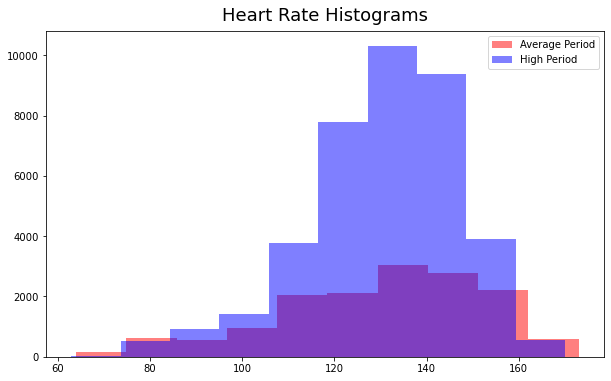

In [18]:
to_hist('heart_rate', 'Heart Rate Histograms');
plt.savefig('../images/heart_rate.png')

## Distance
A lot more trackpoints for further distances in the high period. Average period seems to not go much further than around 55km.

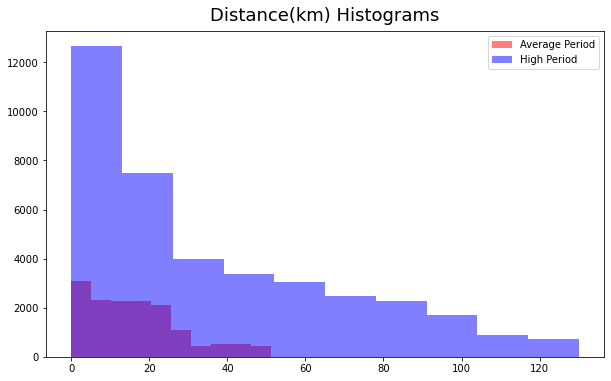

In [19]:
to_hist('total_dist_km', 'Distance(km) Histograms');
plt.savefig('../images/distance.png')

## Speed
Speed didn't seem to differ much. 

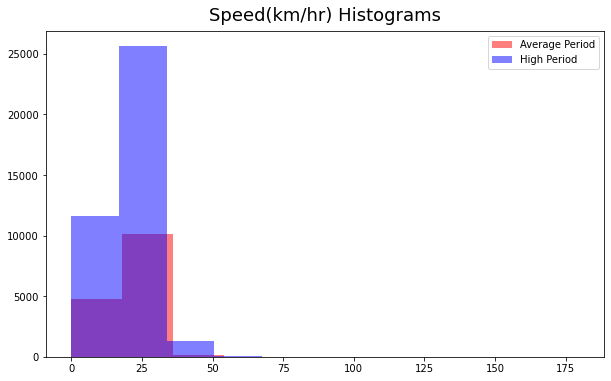

In [20]:
to_hist('speed_km_hr', 'Speed(km/hr) Histograms');
plt.savefig('../images/speed.png')

## Temperature
Temperature is definitely shifted between the two periods which coincides with one period being in the spring and one period being in the summer. 

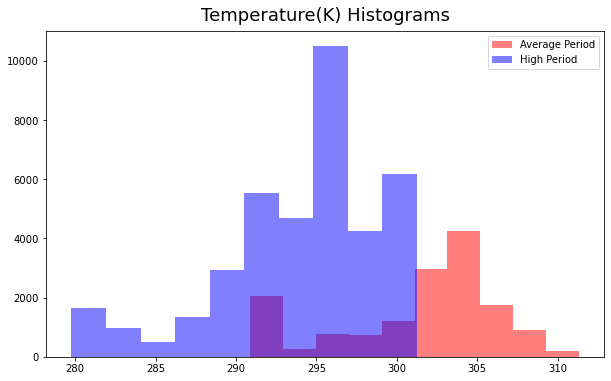

In [21]:
to_hist('temp', 'Temperature(K) Histograms');
plt.savefig('../images/temperature.png')

## Wind Speed
Wind speed seems to be pretty shifted. This could be due to seasonal weather changes or also locations that activities took place. Many activities in the high period were spread out between California's Central Valley, Sierra Foothills, and Bay Area while the average period took place mostly in the Central Valley and Sierra Foothills.

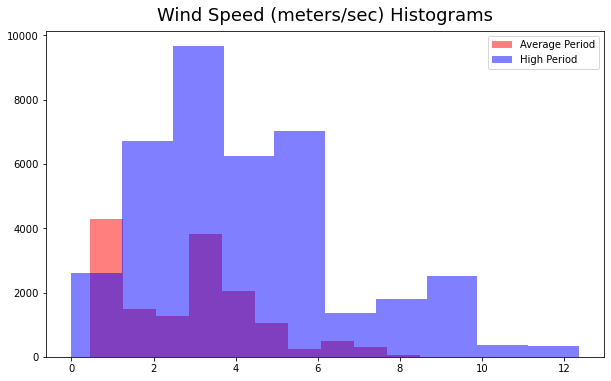

In [22]:
to_hist('wind_speed', 'Wind Speed (meters/sec) Histograms');
plt.savefig('../images/wind_speed.png')

# Exploring Headwind
---

In [23]:
ah_df = pd.concat([a_df,h_df])

In [24]:
ah_df.head()

,timestamp,latitude,longitude,elevation,dt,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,lat_lon,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,speed_km_hr
0,2022-07-20 16:07:45+00:00,38.773466,-121.363686,35.799999,1658333265,78,0.000000,0,0,0.000000,0.0,"(38.77346634864807, -121.36368582956493)",0.0000,0.0000,297.65,297.17,1019,39,282.80,1,0.45,177,0.00
1,2022-07-20 16:07:46+00:00,38.773542,-121.363672,35.599998,1658333266,79,8.292053,1,1,-0.200001,-0.2,"(38.77354153431952, -121.36367183178663)",0.0084,0.0084,297.65,297.17,1019,39,282.80,1,0.45,177,30.24
2,2022-07-20 16:07:49+00:00,38.773630,-121.363682,35.200001,1658333269,82,-5.321180,3,4,-0.399998,-0.6,"(38.77363029867411, -121.36368239298463)",0.0099,0.0183,297.65,297.17,1019,39,282.80,1,0.45,177,11.88
3,2022-07-20 16:07:51+00:00,38.773789,-121.363733,35.000000,1658333271,83,-13.956066,2,6,-0.200001,-0.8,"(38.77378871664405, -121.36373268440366)",0.0181,0.0364,297.67,297.17,1019,38,282.43,1,0.45,177,32.58
4,2022-07-20 16:07:52+00:00,38.773786,-121.363766,35.000000,1658333272,83,-96.936537,1,7,0.000000,-0.8,"(38.77378553152084, -121.36376612819731)",0.0029,0.0393,297.67,297.17,1019,38,282.43,1,0.45,177,10.44


In [25]:
my_sq_m = .381*.4572
my_sq_m

0.1741932

In [26]:
# wind speed in m/s
ah_wind_df = ah_df[['latitude', 'longitude', 'bearing', 'speed_km_hr', 'wind_deg', 'wind_speed']]
ah_wind_df['speed_m_s'] = (ah_wind_df['speed_km_hr']*1000)/(60*60)
ah_wind_df

,latitude,longitude,bearing,speed_km_hr,wind_deg,wind_speed,speed_m_s
0,38.773466,-121.363686,0.000000,0.00,177,0.45,0.000000
1,38.773542,-121.363672,8.292053,30.24,177,0.45,8.400000
2,38.773630,-121.363682,-5.321180,11.88,177,0.45,3.300000
3,38.773789,-121.363733,-13.956066,32.58,177,0.45,9.050000
4,38.773786,-121.363766,-96.936537,10.44,177,0.45,2.900000
...,...,...,...,...,...,...,...
38595,37.781605,-122.141774,-84.988356,11.04,280,9.26,3.066667
38596,37.781509,-122.141909,-131.912054,11.52,280,9.26,3.200000
38597,37.781384,-122.141978,-156.333994,9.06,280,9.26,2.516667
38598,37.781367,-122.142001,-133.240639,1.68,280,9.26,0.466667


In [27]:
# https://mediawiki.ivao.aero/index.php?title=Crosswind_and_Headwind_calculation

# am I in a headwind or tailwind? 
# α is the angle of the wind from direction of travel. 

# Headwind heading = Aircraft heading. The angle shall be: -90° < α < +90°
# α = (Wind speed heading° - Headwind Heading°)

# Tailwind heading = Aircraft heading + 180. The angle shall be: -90° < α < +90°
# α = (Wind speed heading° - Tailwind Heading°) 

In [28]:
ah_wind_df['alpha'] = ah_wind_df['wind_deg'] - ah_wind_df['bearing']
ah_wind_df['headwind'] = [1 if alpha > -90 and alpha < 90 else 0 for alpha in ah_wind_df['alpha']]

In [29]:
ah_wind_df['headwind'].value_counts()

0    46154
1     7539
Name: headwind, dtype: int64

In [30]:
# add alpha and headwind columns to full_df
ah_df['alpha'] = ah_df['wind_deg'] - ah_df['bearing']
ah_df['headwind'] = [1 if alpha > -90 and alpha < 90 else 0 for alpha in ah_df['alpha']]

# Heatmaps!

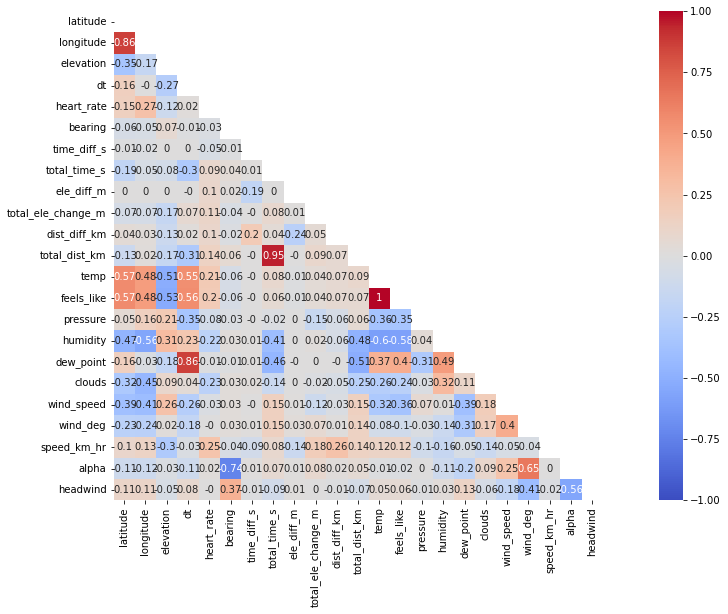

In [31]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (20, 9))

# Get correlation of variables.
corr = round(ah_df.corr(), 2)

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr,
           mask = mask,
           square = True,
           cmap = 'coolwarm', # coolwarm and viridis are good for color blindness
           annot = True,
           vmin = -1,
           vmax = 1);

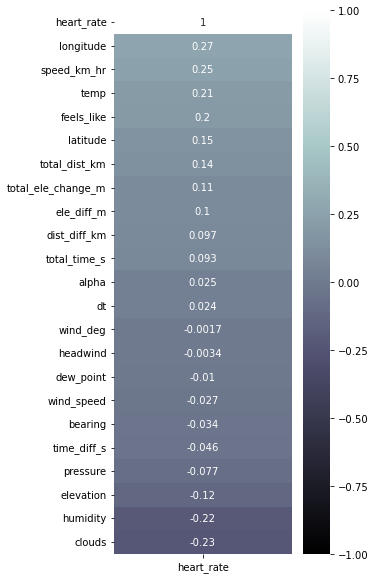

In [32]:
hr_corr = ah_df.corr()[['heart_rate']].sort_values(by = 'heart_rate', ascending = False)

plt.figure(figsize = (4, 10))

sns.heatmap(hr_corr,
           cmap = 'bone',
           annot = True,
           vmin = -1,
           vmax = 1);

# Strava Timeseries EDA
---
#### 96 Activities - 12/18/2022 - 08/11/2022

In [33]:
s_df

,id,type,start_date_local,start_time,distance,moving_time,elapsed_time,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,suffer_score,total_elevation_gain,elev_high,elev_low
0,7624700027,Ride,2022-08-11,15:20:11,26598.9,4575,4750,5.814,8.734,64.5,127.7,158.0,30.0,54.0,38.4,15.8
1,7611476714,Ride,2022-08-09,12:33:34,35604.4,6523,7927,5.458,8.480,61.9,128.0,156.0,44.0,101.0,38.4,8.4
2,7610864586,Ride,2022-08-09,11:52:46,4376.1,1559,1559,2.807,5.350,30.5,84.2,98.0,2.0,11.0,35.0,19.0
3,7599904305,Ride,2022-08-07,11:42:57,4563.0,715,779,6.382,7.659,73.5,131.1,151.0,5.0,4.0,36.2,28.4
4,7594679706,Ride,2022-08-06,13:31:46,50172.3,7711,9425,6.507,10.842,69.1,152.8,173.0,204.0,125.0,49.4,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,6449337462,Ride,2021-12-30,16:35:36,26128.2,4967,5543,5.260,7.040,NaN,NaN,NaN,NaN,55.0,64.2,49.6
92,6435975780,Ride,2021-12-27,16:23:16,27968.6,5560,5782,5.030,7.889,NaN,NaN,NaN,NaN,46.0,43.0,27.6
93,6424133749,Ride,2021-12-24,14:29:08,28816.5,5952,6843,4.841,7.568,NaN,NaN,NaN,NaN,56.8,35.7,22.7
94,6413130460,Ride,2021-12-21,15:49:10,21269.8,4457,5015,4.772,8.206,NaN,NaN,NaN,NaN,51.9,34.8,21.8


In [34]:
s_df.drop(columns = 'id').describe()

,distance,moving_time,elapsed_time,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,suffer_score,total_elevation_gain,elev_high,elev_low
count,96.000000,96.000000,96.000000,96.000000,96.000000,35.000000,68.000000,68.000000,68.000000,96.000000,92.000000,92.000000
mean,32360.305208,5914.812500,7269.489583,5.221010,9.628073,60.614286,125.900000,151.382353,60.808824,169.740625,103.878261,40.343478
std,28401.092931,4662.925674,6302.506679,1.417029,3.457059,9.189673,16.277427,19.861483,69.686988,206.159955,104.466766,50.555513
min,0.000000,328.000000,343.000000,0.000000,0.000000,29.000000,76.500000,89.000000,0.000000,0.000000,-7.400000,-27.600000
25%,16239.150000,3057.000000,3311.250000,4.823750,7.825750,58.200000,117.025000,140.000000,16.000000,33.500000,40.950000,18.900000
50%,27487.800000,4835.500000,5261.000000,5.701500,8.827000,62.500000,127.900000,156.500000,34.500000,67.000000,54.700000,30.200000
75%,32893.875000,6971.750000,9202.000000,6.084750,12.751000,64.900000,136.325000,165.250000,75.250000,275.625000,151.925000,37.200000
max,129736.000000,21457.000000,26828.000000,7.801000,16.945000,73.500000,154.000000,179.000000,299.000000,1006.000000,573.200000,296.800000
